In [1]:
# This program classifies images

In [2]:
# IMport libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
#Look at data type of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Shape fo the arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
#Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

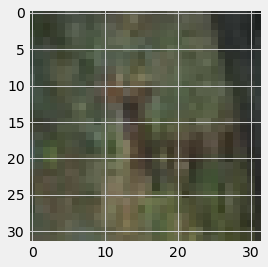

In [7]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [8]:
#Get the image label
print('The image label is: ', y_train[index])

The image label is:  [4]


In [9]:
#Get the image classification - add reference for this
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Print the image class
print('the image class is: ', classification[y_train[index][0]])

the image class is:  deer


In [10]:
#COnvert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#Print the new label of the current image
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
#Create the models architecture
model = Sequential()

#Add the first layer - convulation layr to extract features from imput image
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3))) #imput shape for the first layer only

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2))) #(2,2) pixel filter to get the max element 

#Add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu')) #Just get rid of thr imput shape from first layer

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattening layer
model.add(Flatten()) #this reduces the dimensionality to linear array

#take all of this data and input to neurons
#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5)) #dropout rate at 50%

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax')) #for 10 labels


In [16]:
#COmpile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)


In [17]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=256,
                 epochs=10,
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 1.8411 - accuracy: 0.3104 - val_loss: 1.5786 - val_accuracy: 0.4260
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 1.4527 - accuracy: 0.4679 - val_loss: 1.2967 - val_accuracy: 0.5363
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 1.2959 - accuracy: 0.5331 - val_loss: 1.2060 - val_accuracy: 0.5694
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 1.1734 - accuracy: 0.5811 - val_loss: 1.0869 - val_accuracy: 0.6192
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0854 - accuracy: 0.6121 - val_loss: 1.1822 - val_accuracy: 0.5861
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 1.0013 - accuracy: 0.6450 - val_loss: 1.0056 - val_accuracy: 0.6485
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.9468 - accuracy: 0.6654 - val_loss: 0.9958 - val_accuracy: 0.6511
Epoch

In [18]:
#Evaluate the model using the test dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9621 - accuracy: 0.6670


0.6669999957084656

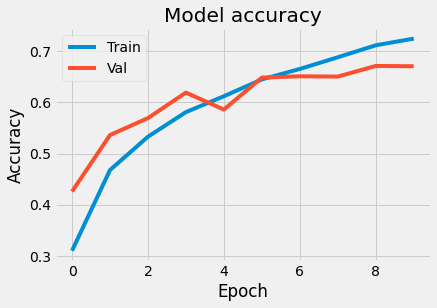

In [20]:
#Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

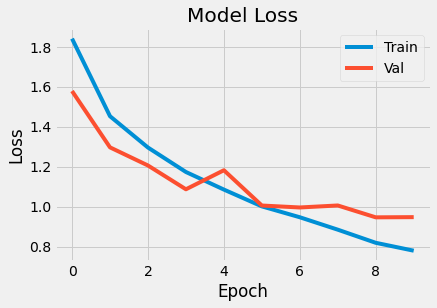

In [21]:
#VIsualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [22]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving cat1.jpg to cat1.jpg


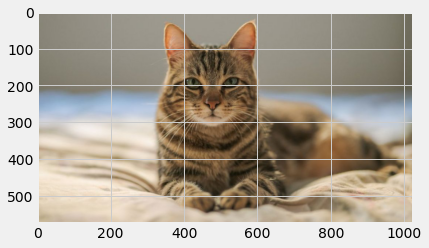

In [24]:
#show the image
new_image = plt.imread('cat1.jpg')
img = plt.imshow(new_image)

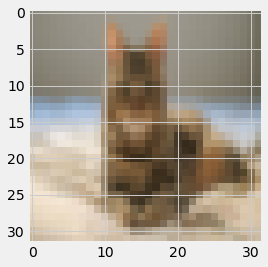

In [25]:
#Resize the image
from skimage.transform import resize
resize_image = resize(new_image, (32,32,3))
img = plt.imshow(resize_image)

In [27]:
#Get the model's predictions
predictions = model.predict(np.array([resize_image]))

#show the predictions
predictions

array([[3.8627367e-03, 3.6705303e-04, 1.4081238e-01, 4.7019657e-01,
        5.7218317e-02, 1.3804948e-01, 1.4499760e-01, 4.1549791e-02,
        1.3400236e-03, 1.6060314e-03]], dtype=float32)

In [28]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#SHow the sorted labels in order
print(list_index)

[3, 6, 2, 5, 4, 7, 0, 9, 8, 1]


In [32]:
#Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2), '%')

cat : 47.02 %
frog : 14.5 %
bird : 14.08 %
dog : 13.8 %
deer : 5.72 %
